In [68]:
import glob as glob
import xarray as xr
import datetime as datetime
import numpy as np
import xarray as xr
from pathlib import Path
from winter_year import WinterYear


winter_year = WinterYear(2023, 2024)
time_series_folder = '../output_folder/cms_workshop'

s2_filename = 'WY_2023_2024_S2_res_250m_time_series.nc'
mf_filename = 'WY_2023_2024_SuomiNPP_meteofrance_time_series.nc'
nasa_filename = 'WY_2023_2024_SuomiNPP_nasa_fsc_time_series.nc'
s2_time_series = xr.open_dataset(Path(f"{time_series_folder}").joinpath(s2_filename))
meteofrance_time_series = xr.open_dataset(Path(f"{time_series_folder}").joinpath(mf_filename))
nasa_time_series = xr.open_dataset(Path(f"{time_series_folder}").joinpath(nasa_filename))
common1 = np.intersect1d(meteofrance_time_series["time"], s2_time_series["time"])
common_days = np.intersect1d(common1, nasa_time_series["time"])

In [73]:
from datetime import datetime
def daily_average(data_array: xr.DataArray):
    time_coord = data_array.coords['time'].values
    month_datetime = datetime(int(str(time_coord[0])[:4]), int(str(time_coord[0])[5:7]), int(str(time_coord[0])[8:10]))
    return xr.DataArray([data_array.sum().values / len(time_coord)], coords={'time': [month_datetime]})


In [100]:
biases, rmses = [],[]
for day in common_days:
    nasa = nasa_time_series.data_vars['snow_cover'].sel(time=day) /100
    nasa_mask = nasa <=1
    s2 = s2_time_series.data_vars['snow_cover'].sel(time=day) / 100
    s2_mask = s2<=1
    diff = nasa.where(nasa_mask)- s2.where(s2_mask)
    b = np.nanmean(diff)
    biases.append(b)
    rmses.append(np.sqrt(np.nanmean((diff- b)**2)))

errors_nasa_no_forest = xr.Dataset({'bias': xr.DataArray(biases, coords={'time':common_days}),
                    'rmse': xr.DataArray(rmses, coords={'time':common_days})})
errors_nasa_no_forest.to_netcdf('errors_nasa.nc')

/tmp/ipykernel_13865/1720348248.py:8: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_13865/1720348248.py:10: RuntimeWarning: Mean of empty slice
  rmses.append(np.sqrt(np.nanmean((diff- b)**2)))
/tmp/ipykernel_13865/1720348248.py:8: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_13865/1720348248.py:10: RuntimeWarning: Mean of empty slice
  rmses.append(np.sqrt(np.nanmean((diff- b)**2)))
/tmp/ipykernel_13865/1720348248.py:8: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_13865/1720348248.py:10: RuntimeWarning: Mean of empty slice
  rmses.append(np.sqrt(np.nanmean((diff- b)**2)))
/tmp/ipykernel_13865/1720348248.py:8: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_13865/1720348248.py:10: RuntimeWarning: Mean of empty slice
  rmses.append(np.sqrt(np.nanmean((diff- b)**2)))
/tmp/ipykernel_13865/1720348248.py:8: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_

In [69]:
biases, rmses = [],[]
for day in common_days:
    mf_snow_forest_mask = meteofrance_time_series.data_vars['snow_cover'].sel(time=day) != 210
    nasa = nasa_time_series.data_vars['snow_cover'].sel(time=day) /100
    nasa_mask = nasa <=1
    s2 = s2_time_series.data_vars['snow_cover'].sel(time=day) / 100
    s2_mask = s2<=1
    diff = nasa.where(nasa_mask).where(mf_snow_forest_mask) - s2.where(s2_mask)
    b = np.nanmean(diff)
    biases.append(b)
    rmses.append(np.sqrt(np.nanmean((diff- b)**2)))

errors_nasa_no_forest = xr.Dataset({'bias': xr.DataArray(biases, coords={'time':common_days}),
                    'rmse': xr.DataArray(rmses, coords={'time':common_days})})
# errors_nasa_no_forest.to_netcdf('errors_nasa_no_forest.nc')

/tmp/ipykernel_13865/1072225622.py:9: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_13865/1072225622.py:11: RuntimeWarning: Mean of empty slice
  rmses.append(np.sqrt(np.nanmean((diff- b)**2)))
/tmp/ipykernel_13865/1072225622.py:9: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_13865/1072225622.py:11: RuntimeWarning: Mean of empty slice
  rmses.append(np.sqrt(np.nanmean((diff- b)**2)))
/tmp/ipykernel_13865/1072225622.py:9: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_13865/1072225622.py:11: RuntimeWarning: Mean of empty slice
  rmses.append(np.sqrt(np.nanmean((diff- b)**2)))
/tmp/ipykernel_13865/1072225622.py:9: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_13865/1072225622.py:11: RuntimeWarning: Mean of empty slice
  rmses.append(np.sqrt(np.nanmean((diff- b)**2)))
/tmp/ipykernel_13865/1072225622.py:9: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_

In [70]:


biases, rmses = [],[]
for day in common_days:
    mf_snow_forest_mask = meteofrance_time_series.data_vars['snow_cover'].sel(time=day) == 210
    nasa = nasa_time_series.data_vars['snow_cover'].sel(time=day) /100
    nasa_mask = nasa <=1
    s2 = s2_time_series.data_vars['snow_cover'].sel(time=day) / 100
    s2_mask = s2<=1
    diff = nasa.where(nasa_mask).where(mf_snow_forest_mask) - s2.where(s2_mask)
    b = np.nanmean(diff)
    biases.append(b)
    rmses.append(np.sqrt(np.nanmean((diff- b)**2)))

errors_nasa_forest = xr.Dataset({'bias': xr.DataArray(biases, coords={'time':common_days}),
                    'rmse': xr.DataArray(rmses, coords={'time':common_days})})
# errors_nasa_forest.to_netcdf('errors_nasa_forest.nc')

/tmp/ipykernel_13865/548024419.py:9: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_13865/548024419.py:11: RuntimeWarning: Mean of empty slice
  rmses.append(np.sqrt(np.nanmean((diff- b)**2)))
/tmp/ipykernel_13865/548024419.py:9: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_13865/548024419.py:11: RuntimeWarning: Mean of empty slice
  rmses.append(np.sqrt(np.nanmean((diff- b)**2)))
/tmp/ipykernel_13865/548024419.py:9: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_13865/548024419.py:11: RuntimeWarning: Mean of empty slice
  rmses.append(np.sqrt(np.nanmean((diff- b)**2)))
/tmp/ipykernel_13865/548024419.py:9: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_13865/548024419.py:11: RuntimeWarning: Mean of empty slice
  rmses.append(np.sqrt(np.nanmean((diff- b)**2)))
/tmp/ipykernel_13865/548024419.py:9: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_13865/548

In [78]:

biases, rmses = [],[]
for day in common_days:
    mf = meteofrance_time_series.data_vars['snow_cover'].sel(time=day) /200
    mf_mask = mf <=1
    s2 = s2_time_series.data_vars['snow_cover'].sel(time=day) / 100
    s2_mask = s2<=1
    diff =  mf.where(mf_mask) - s2.where(s2_mask)
    b = np.nanmean(diff)
    biases.append(b)
    rmses.append(np.sqrt(np.nanmean((diff- b)**2)))

errors_mf = xr.Dataset({'bias': xr.DataArray(biases, coords={'time':common_days}),
                    'rmse': xr.DataArray(rmses, coords={'time':common_days})})
# errors_mf.to_netcdf('errors_meteofrance.nc')

/tmp/ipykernel_13865/2178131637.py:8: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_13865/2178131637.py:10: RuntimeWarning: Mean of empty slice
  rmses.append(np.sqrt(np.nanmean((diff- b)**2)))
/tmp/ipykernel_13865/2178131637.py:8: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_13865/2178131637.py:10: RuntimeWarning: Mean of empty slice
  rmses.append(np.sqrt(np.nanmean((diff- b)**2)))
/tmp/ipykernel_13865/2178131637.py:8: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_13865/2178131637.py:10: RuntimeWarning: Mean of empty slice
  rmses.append(np.sqrt(np.nanmean((diff- b)**2)))
/tmp/ipykernel_13865/2178131637.py:8: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_13865/2178131637.py:10: RuntimeWarning: Mean of empty slice
  rmses.append(np.sqrt(np.nanmean((diff- b)**2)))
/tmp/ipykernel_13865/2178131637.py:8: RuntimeWarning: Mean of empty slice
  b = np.nanmean(diff)
/tmp/ipykernel_

In [101]:
errors_nasa = xr.open_dataset('errors_nasa.nc')
errors_nasa_no_forest = xr.open_dataset('errors_nasa_no_forest.nc')
errors_nasa_forest = xr.open_dataset('errors_nasa_forest.nc')
errors_mf = xr.open_dataset('errors_meteofrance.nc')

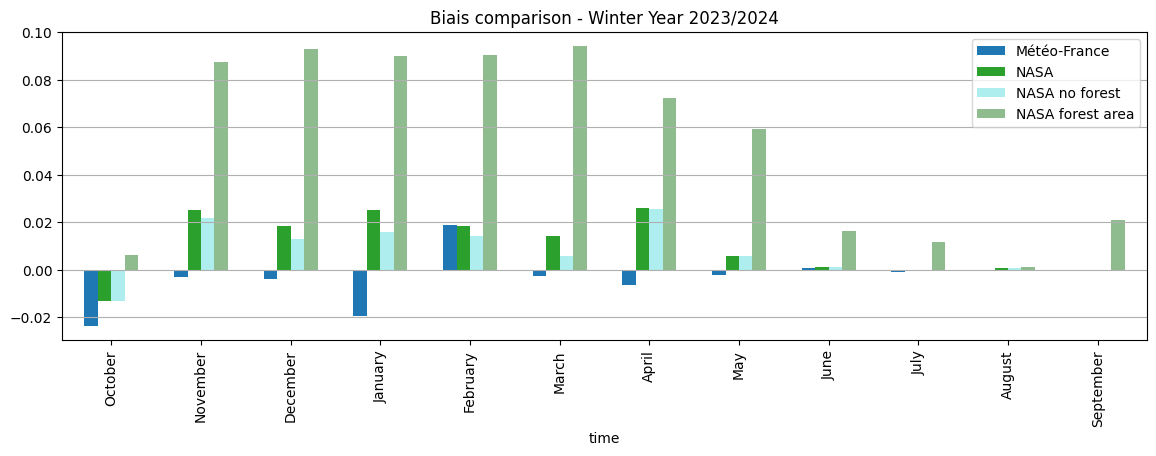

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
nasa_series = errors_nasa.data_vars['bias'].groupby('time.month').map(daily_average).sortby('time').to_pandas()
nasa_no_forest_series = errors_nasa_no_forest.data_vars['bias'].groupby('time.month').map(daily_average).sortby('time').to_pandas()
meteofrance_series = errors_mf.data_vars['bias'].groupby('time.month').map(daily_average).sortby('time').to_pandas()
nasa_forest_series = errors_nasa_forest.data_vars['bias'].groupby('time.month').map(daily_average).sortby('time').to_pandas()

rmse_df = pd.DataFrame({ 'Météo-France': meteofrance_series, 'NASA': nasa_series,'NASA no forest': nasa_no_forest_series,'NASA forest area': nasa_forest_series})
rmse_df.index = rmse_df.index.strftime("%B")
rmse_df.plot.bar(figsize=(14,4), color=('tab:blue', 'tab:green','paleturquoise', 'darkseagreen'), width=0.6, title='Biais comparison - Winter Year 2023/2024')
plt.grid(True,axis='y')

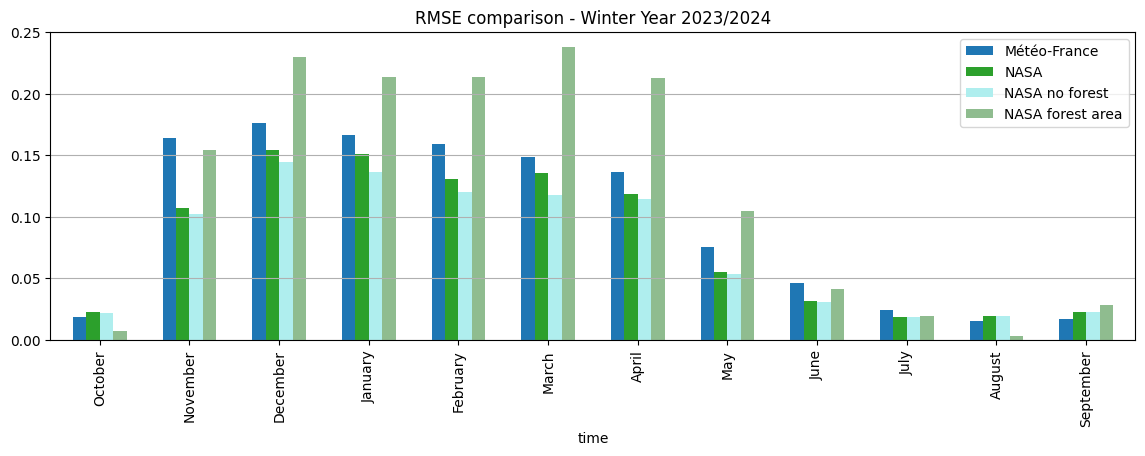

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
nasa_series = errors_nasa.data_vars['rmse'].groupby('time.month').map(daily_average).sortby('time').to_pandas()
nasa_no_forest_series = errors_nasa_no_forest.data_vars['rmse'].groupby('time.month').map(daily_average).sortby('time').to_pandas()
meteofrance_series = errors_mf.data_vars['rmse'].groupby('time.month').map(daily_average).sortby('time').to_pandas()
nasa_forest_series = errors_nasa_forest.data_vars['rmse'].groupby('time.month').map(daily_average).sortby('time').to_pandas()

rmse_df = pd.DataFrame({ 'Météo-France': meteofrance_series, 'NASA': nasa_series,'NASA no forest': nasa_no_forest_series,'NASA forest area': nasa_forest_series})
rmse_df.index = rmse_df.index.strftime("%B")
rmse_df.plot.bar(figsize=(14,4), color=('tab:blue', 'tab:green','paleturquoise', 'darkseagreen'), width=0.6, title='RMSE comparison - Winter Year 2023/2024')
plt.grid(True,axis='y')